In [1]:
import module.DataPreprocessing as data_pp
import platform

# 클래스 수정 시 import 리로드
import importlib
importlib.reload(data_pp)

current_os = platform.system()
sep = "\\" if current_os == "Windows" else "/"

# 파일경로, 라벨 정보 추출
root_folder = f"..{sep}01.Data{sep}01.fish"
dp = data_pp.DataPreprocessing()
file_path, label = dp.get_file_path(root_folder, "png")
len(file_path), len(label)

(9281, 9281)

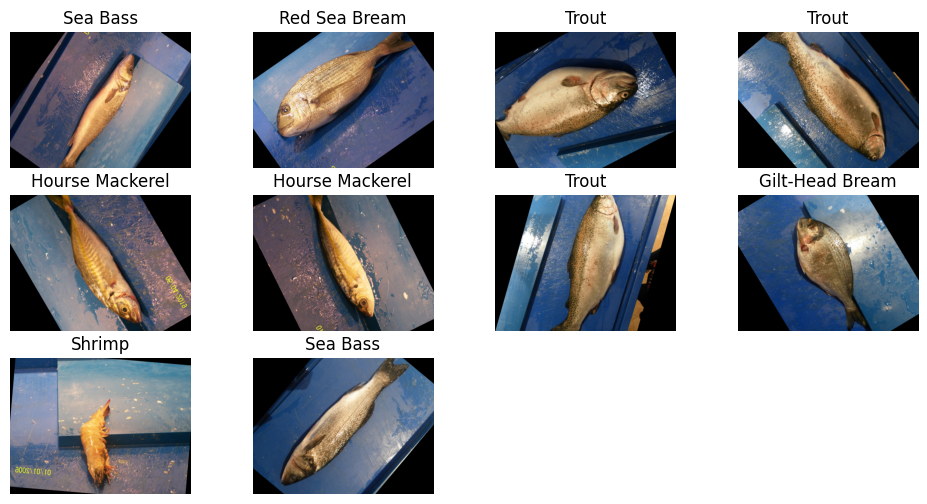

In [2]:
# 샘플 그림
dp.get_sample_image(10, file_path, label)

In [3]:
# 라벨 인덱싱
indexed_label_arr = dp.label_indexing(label)
dp.get_label_dic()

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [4]:
# # 데이터셋 나누기
test_set, valid_set, train_set = dp.split_test_vaild_train(file_path, indexed_label_arr, 0.15)
len(test_set), len(valid_set), len(train_set)

(1403, 1403, 6475)

In [ ]:
import  module.CNN as CNN

import importlib
importlib.reload(CNN)

# 상수 및 변수 셋팅
device = dp.get_device()
learning_rate = 0.001
training_epochs = 5
batch_size = 10
img_size = 256 # 이미지 사이즈 조절
save_path = f".{sep}save_model{sep}01.CutomLoader_CNN{sep}CutomLoader_CNN.pth" # 모델 저장 위치

model = CNN.CNN().to(device)

In [ ]:
# # 배치사이즈로 나누기
test_X, test_Y = dp.make_batch_arr(test_set, batch_size)
valid_X, valid_Y = dp.make_batch_arr(valid_set, batch_size)
train_X, train_Y = dp.make_batch_arr(train_set, batch_size)

In [ ]:
# # 폴더명, 라벨 정보 일치 여부 확인
print(dp.verify_dataset(test_X, test_Y))
print(dp.verify_dataset(valid_X, valid_Y))
print(dp.verify_dataset(train_X, train_Y))

True
True
True


In [ ]:
# # 배치 갯수
len(train_X), len(train_Y), len(valid_X), len(valid_Y), len(test_X), len(test_Y)

(647, 647, 140, 140, 140, 140)

In [ ]:
dp.run_epoch(train_X, train_Y, valid_X, valid_Y, training_epochs, device, model, learning_rate, img_size, save_path)

100%|██████████| 140/140 [01:11<00:00,  1.95it/s]


Epoch: 1, cost = 0.102396078, valid_cost = 0.075264126
validation = 일치 : 1370/1400, 정확도 : 0.978571429
모델 저장완료


100%|██████████| 140/140 [01:47<00:00,  1.31it/s]


Epoch: 2, cost = 0.017078759, valid_cost = 0.079314508
validation = 일치 : 1373/1400, 정확도 : 0.980714286
모델 저장완료


100%|██████████| 140/140 [01:17<00:00,  1.82it/s]


Epoch: 3, cost = 0.021245422, valid_cost = 0.127806753
validation = 일치 : 1344/1400, 정확도 : 0.960000000
모델 저장완료


100%|██████████| 140/140 [01:27<00:00,  1.59it/s]


Epoch: 4, cost = 0.023206975, valid_cost = 0.102586858
validation = 일치 : 1367/1400, 정확도 : 0.976428571
모델 저장완료


100%|██████████| 140/140 [01:20<00:00,  1.73it/s]

Epoch: 5, cost = 0.006607541, valid_cost = 0.073168695
validation = 일치 : 1376/1400, 정확도 : 0.982857143
모델 저장완료


In [117]:
model = dp.load_model(model, save_path)
dp.test_model(test_X, test_Y, device, model, img_size)

  0%|          | 0/140 [00:00<?, ?it/s]

100%|██████████| 140/140 [01:04<00:00,  2.17it/s]

일치 : 1378 / 1400, 0.984285714


In [118]:
black = file_path[5500]
black

'..\\01.Data\\01.fish\\Fish_Dataset\\Fish_Dataset\\Sea Bass\\Sea Bass\\00501.png'

In [119]:
# path = [r"E:\02.공부\02.코딩\01.Python\01.Alphaco\02.코드\03.프로젝트\03.이미지분류\01.Data\01.fish\sh.jpg"]

test = dp.make_tensor_arr([black], 256)
test.shape

torch.Size([1, 3, 256, 256])

In [120]:
con = model(test)

In [121]:
import torch
_, pred = torch.max(con, 1)

In [122]:
pred

tensor([5])

In [123]:
dp.get_label_dic()

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [125]:
import torch.nn.functional as F
con

tensor([[-38.7769, -19.0981, -23.1125, -26.8541, -51.1615,  -6.3851, -22.7763,
         -32.7672, -31.8186]], grad_fn=<AddmmBackward0>)

In [126]:
F.sigmoid(con)

tensor([[1.4435e-17, 5.0791e-09, 9.1696e-11, 2.1747e-12, 6.0370e-23, 1.6836e-03,
         1.2835e-10, 5.8804e-15, 1.5183e-14]], grad_fn=<SigmoidBackward0>)